In [2]:
import numpy as numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("File 1.csv")

In [4]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

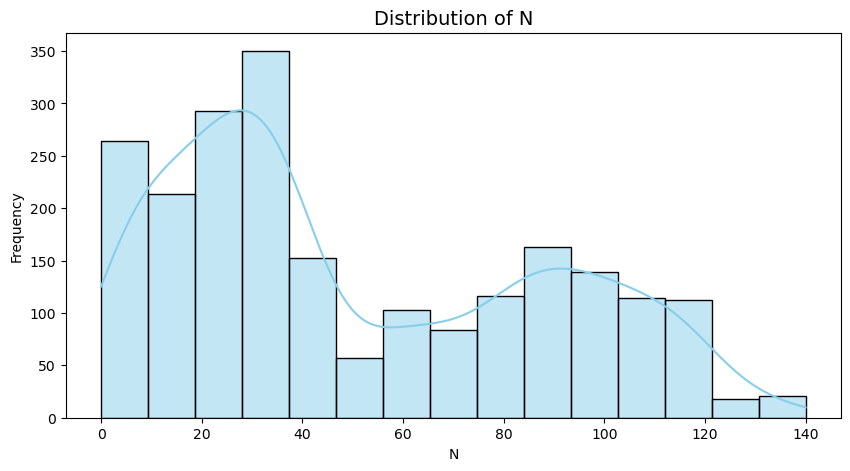

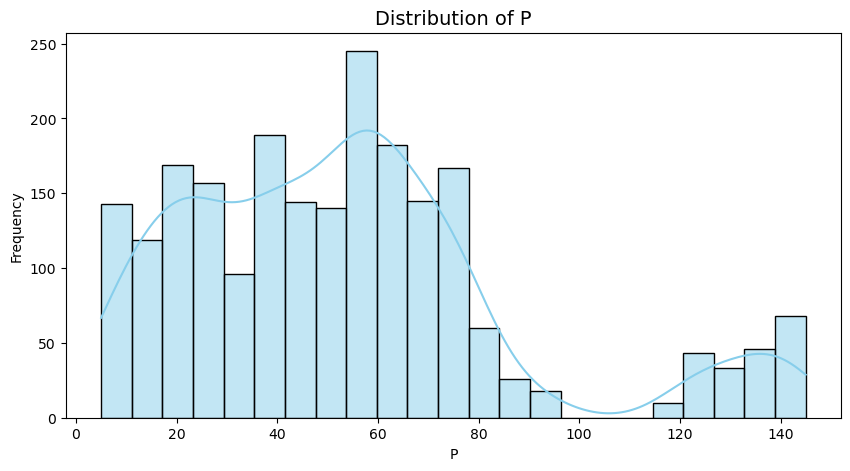

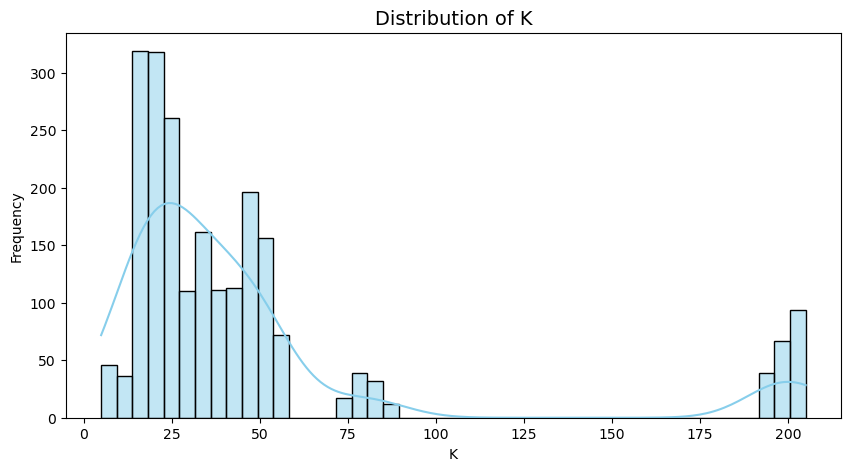

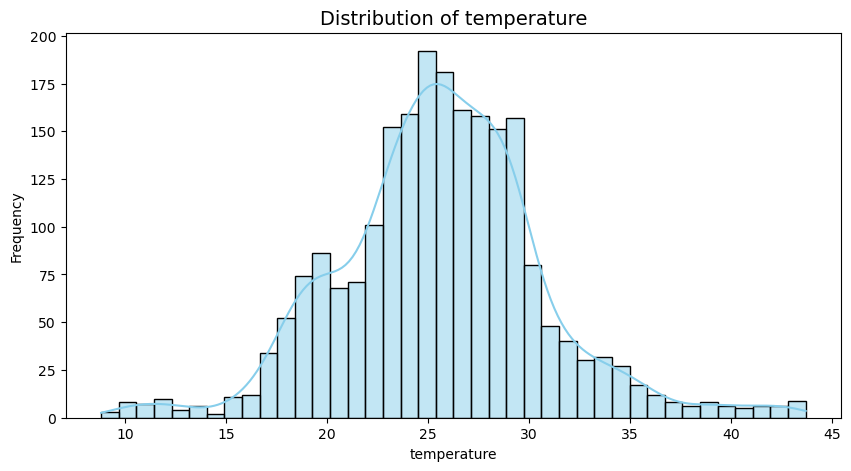

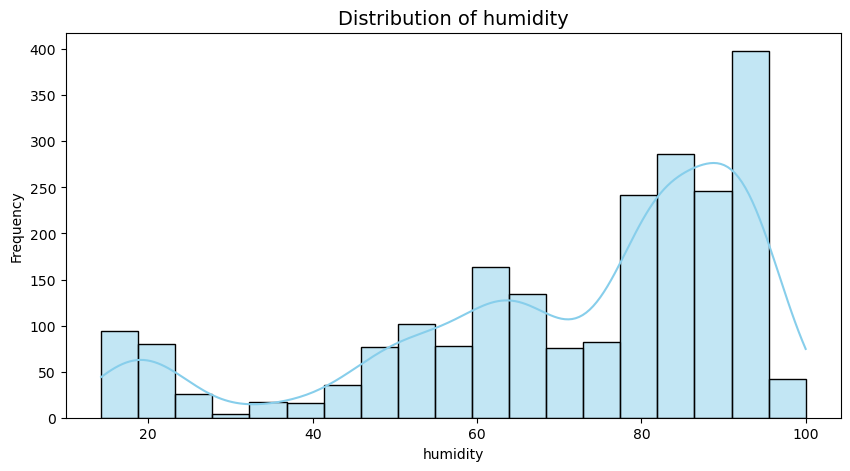

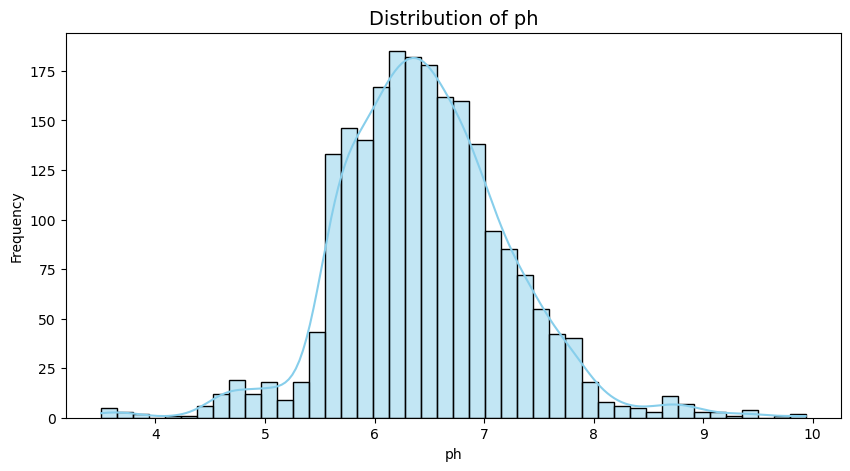

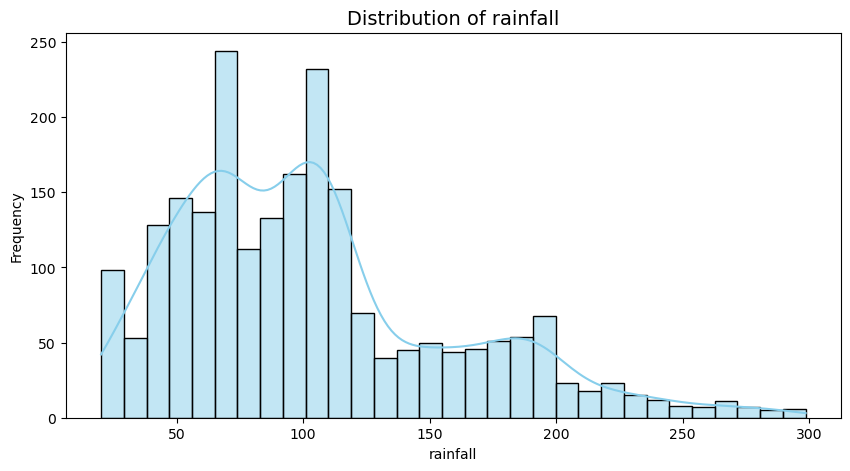

In [8]:
numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


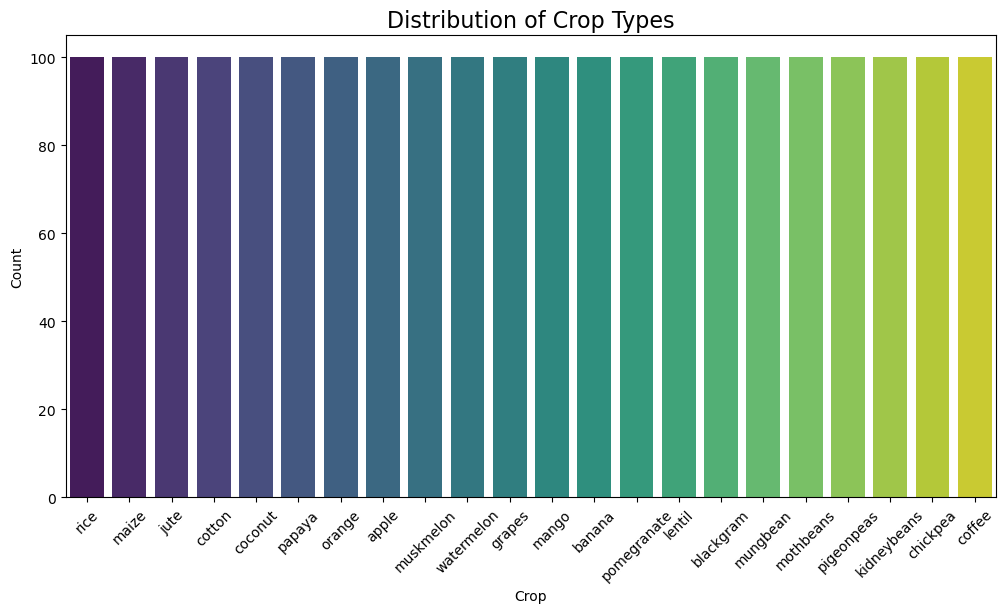

In [9]:
if 'label' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='label', data=df, palette='viridis', order=df['label'].value_counts().index)
    plt.title("Distribution of Crop Types", fontsize=16)
    plt.xlabel("Crop")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

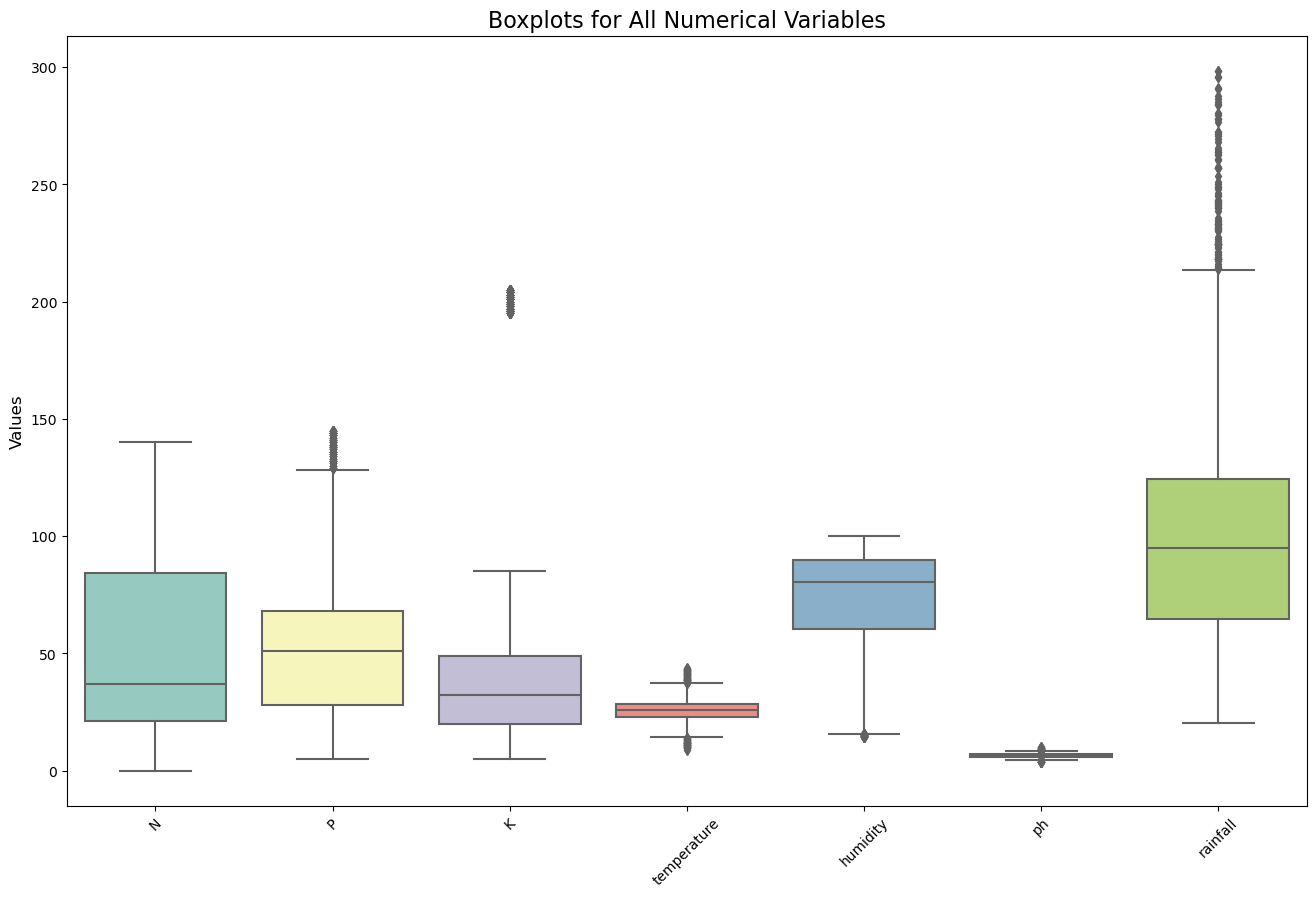

In [10]:
numeric_columns = df.select_dtypes(include='number').columns

# 📊 رسم المخططات الصندوقية لجميع الأعمدة الرقمية
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[numeric_columns], palette="Set3")
plt.title("Boxplots for All Numerical Variables", fontsize=16)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [11]:
numeric_columns = df.select_dtypes(include='number').columns

# 🧹 دالة لمعالجة القيم الشاذة باستخدام IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # إزالة القيم الشاذة
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 🔎 معالجة القيم الشاذة
df_cleaned = remove_outliers_iqr(df, numeric_columns)


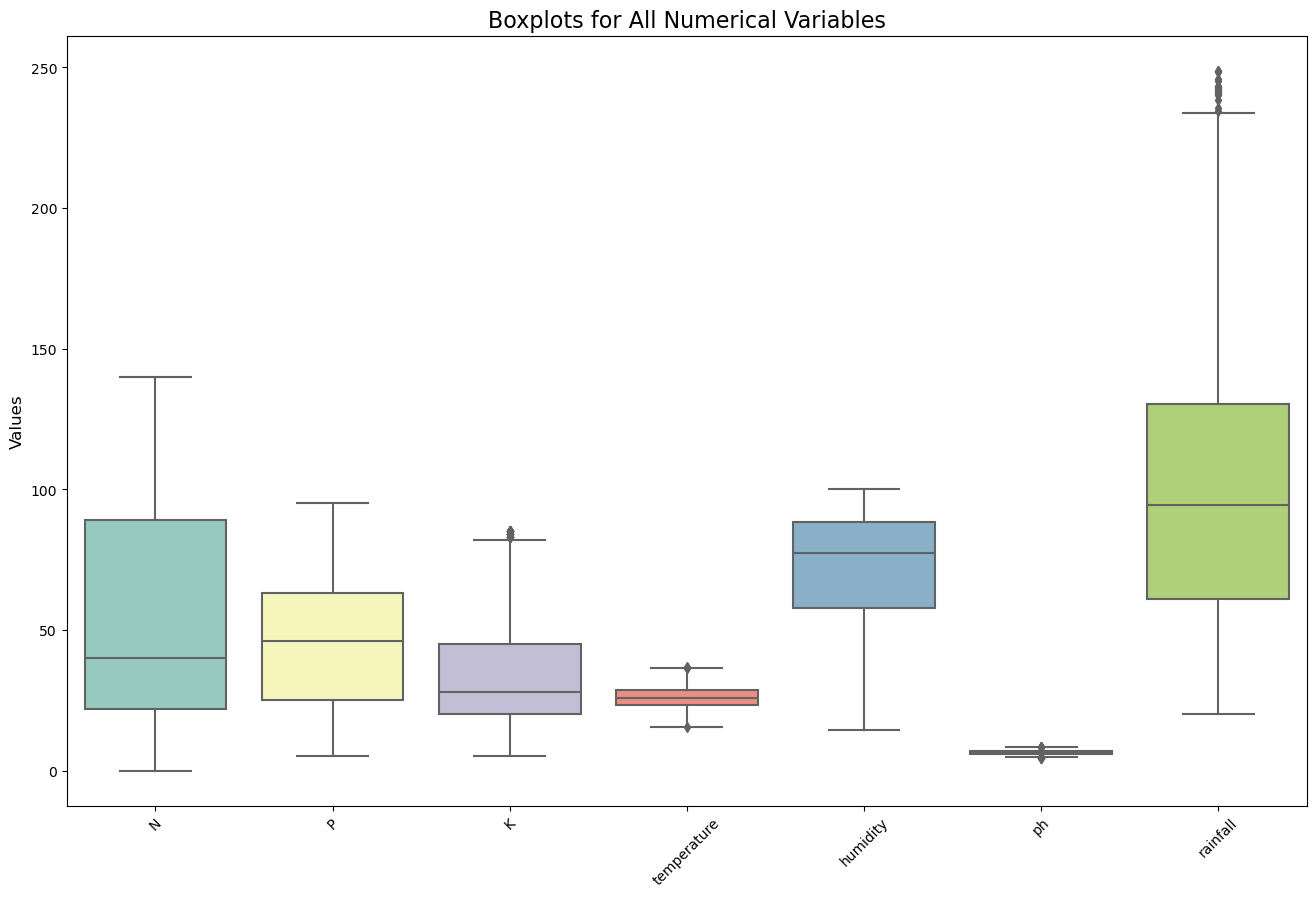

In [12]:
umeric_columns = df.select_dtypes(include='number').columns

# 📊 رسم المخططات الصندوقية لجميع الأعمدة الرقمية
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned[numeric_columns], palette="Set3")
plt.title("Boxplots for All Numerical Variables", fontsize=16)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [13]:
df_cleaned.describe()

N            P            K  temperature     humidity  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean     54.210184    45.161430    32.745937    25.711188    69.770583   
std      37.928591    22.506246    16.614550     4.155121    22.649324   
min       0.000000     5.000000     5.000000    15.330426    14.258040   
25%      22.000000    25.000000    20.000000    23.267408    57.749008   
50%      40.000000    46.000000    28.000000    25.839646    77.331406   
75%      89.000000    63.000000    45.000000    28.518889    88.288685   
max     140.000000    95.000000    85.000000    36.750875    99.981876   

                ph     rainfall  
count  1846.000000  1846.000000  
mean      6.493357   101.474427  
std       0.680293    52.432682  
min       4.603563    20.211267  
25%       6.033501    61.144916  
50%       6.470301    94.279811  
75%       6.944110   130.387488  
max       8.399136   248.859299

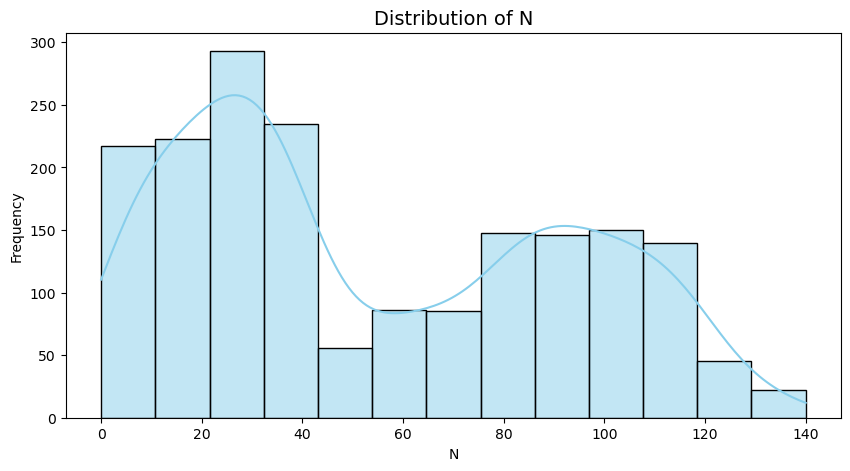

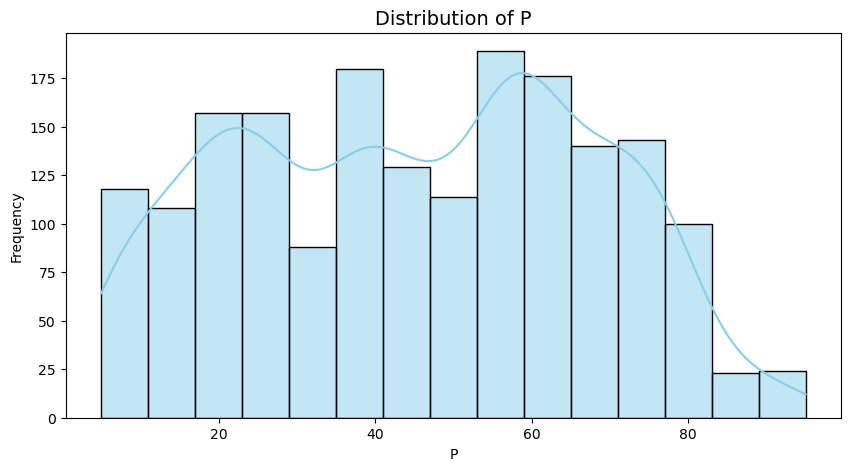

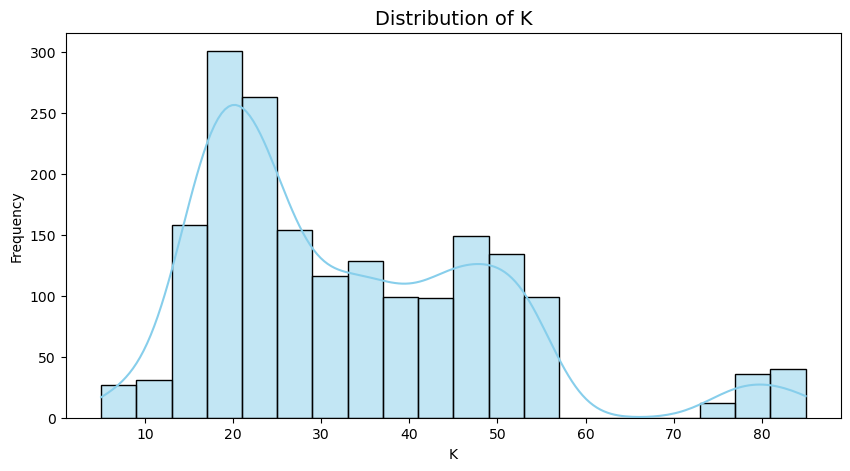

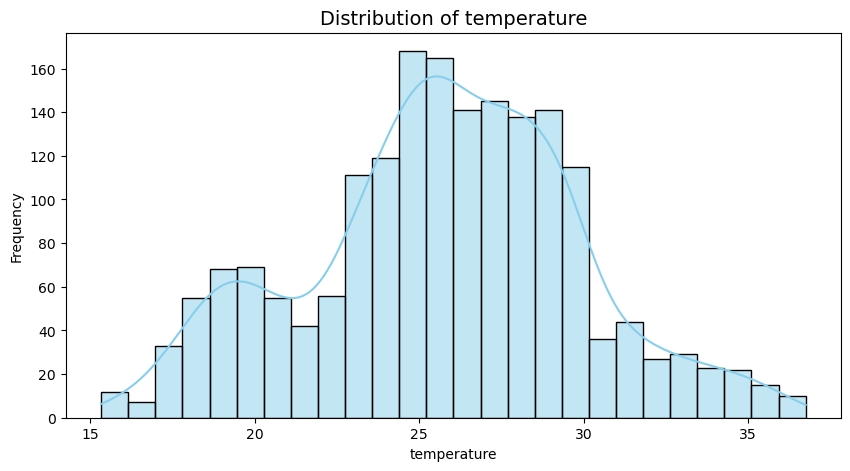

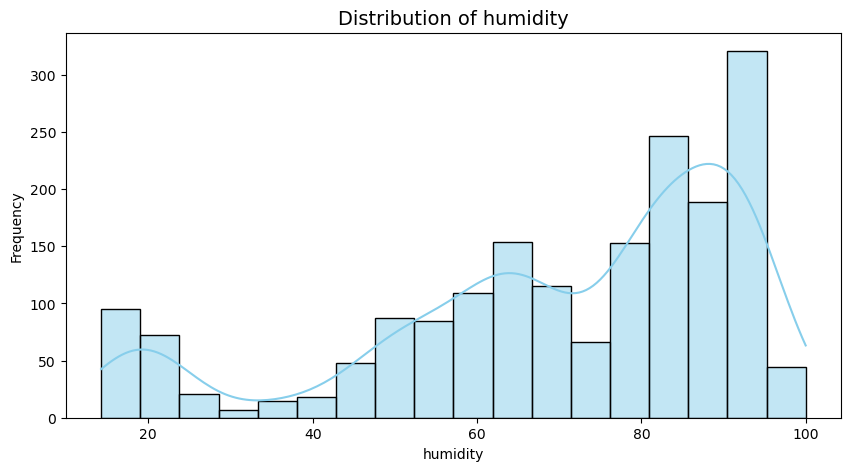

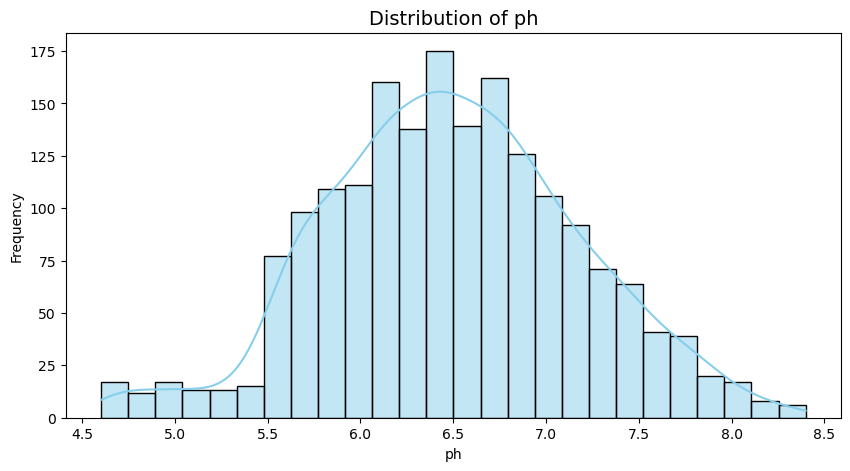

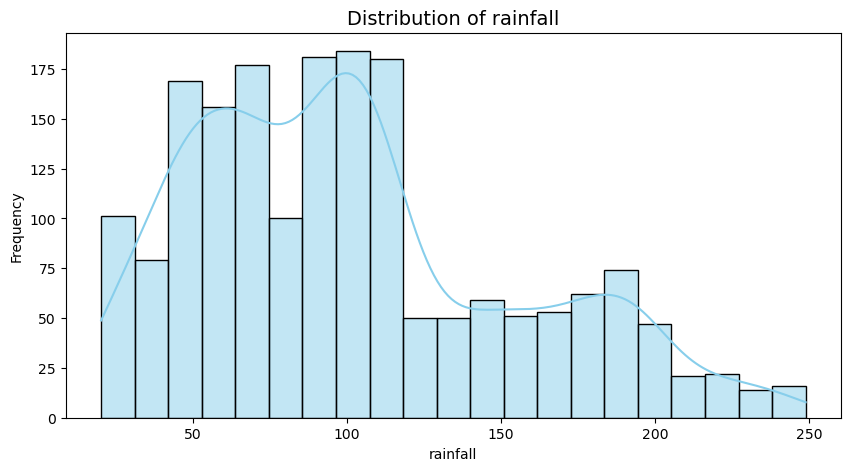

In [14]:
numeric_columns = df_cleaned.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

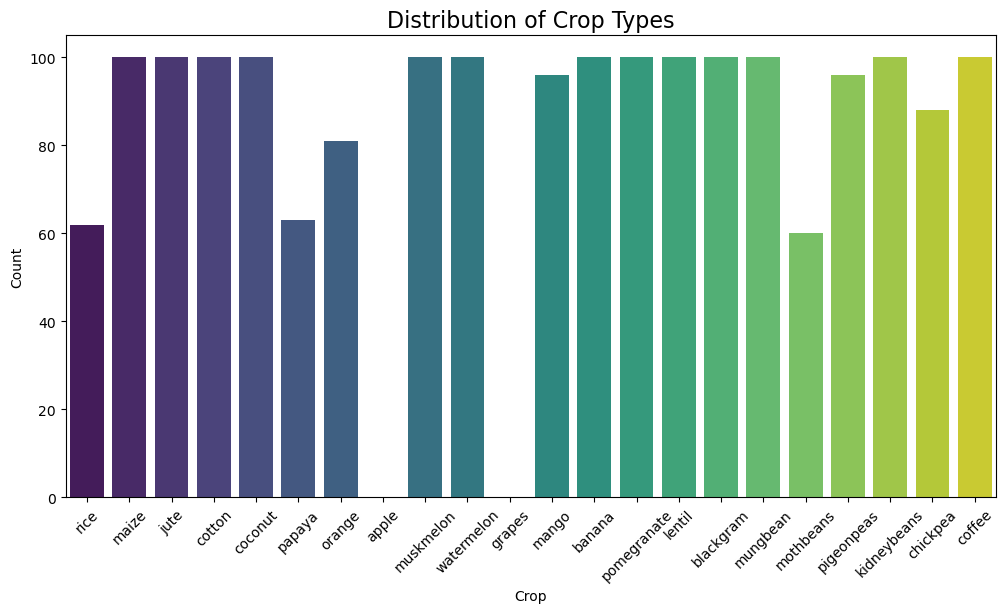

In [15]:
if 'label' in df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='label', data=df_cleaned, palette='viridis', order=df['label'].value_counts().index)
    plt.title("Distribution of Crop Types", fontsize=16)
    plt.xlabel("Crop")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [16]:
import plotly.express as px
correlation_matrix = df.corr()
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale='RdBu_r',
    aspect="auto",
    labels=dict(color="Correlation")
)

fig.update_layout(
    title="Interactive Correlation Heatmap",
    width=900,
    height=700
)

fig.show()


In [17]:
 def assign_season(temp):
    if temp < 20:
        return 'Winter'
    elif 20 <= temp < 30:
        return 'Spring/Autumn'
    else:
        return 'Summer'
df['season'] = df['temperature'].apply(assign_season)
print(df[['temperature', 'season']].head())
season_crop_distribution = df['season'].value_counts()
print(season_crop_distribution)


   temperature         season
0    20.879744  Spring/Autumn
1    21.770462  Spring/Autumn
2    23.004459  Spring/Autumn
3    26.491096  Spring/Autumn
4    20.130175  Spring/Autumn
Spring/Autumn    1611
Summer            298
Winter            291
Name: season, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = df_cleaned
df['productivity'] = (df['rainfall'] * 0.4 + df['temperature'] * 0.3 + df['N'] * 0.2 + df['P'] * 0.1)

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


MSE: 0.00
R² Score: 1.00


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = df_cleaned[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df_cleaned['productivity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f" MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f" R² Score: {r2_score(y_test, y_pred):.2f}")


 MSE: 2.89
 R² Score: 0.99


In [20]:
import streamlit as st


In [32]:
st.set_page_config(page_title="Agricultural Crop Prediction Dashboard", layout="wide")
st.title(" Agricultural Crop Prediction Dashboard")
st.sidebar.header(" Navigation")

page = st.sidebar.radio("Go to:", ("Overview", "Seasonal Analysis", "Productivity Prediction", "Correlation Analysis"))

if page == "Overview":
    st.subheader(" Data Overview")
    st.write(df.head())

    with st.expander(" Dataset Statistics"):
        st.write(df.describe())

    st.write("### Feature Distributions")
    features = df.select_dtypes(include='number').columns
    selected_feature = st.selectbox("Select a feature to visualize:", features)

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(df[selected_feature], kde=True, color='skyblue', ax=ax)
    ax.set_title(f"Distribution of {selected_feature}")
    st.pyplot(fig)

elif page == "Seasonal Analysis":
    st.subheader(" Seasonal Crop Analysis")

    def assign_season(temp):
        if temp < 20:
            return 'Winter'
        elif 20 <= temp < 30:
            return 'Spring/Autumn'
        else:
            return 'Summer'

    if 'season' not in df.columns:
        df['season'] = df['temperature'].apply(assign_season)

    season_counts = df['season'].value_counts()
    st.write("### Season Distribution")
    st.bar_chart(season_counts)

    if 'label' in df.columns:
        st.write("### Crop Distribution by Season")
        season_crop = df.groupby(['season', 'label']).size().unstack(fill_value=0)
        st.bar_chart(season_crop)

elif page == "Productivity Prediction":
    st.subheader(" Predict Crop Productivity using Linear Regression")

    with st.form("prediction_form"):
        st.write("Enter the environmental and soil factors to predict productivity:")
        n = st.number_input("N (Nitrogen)", min_value=0.0, value=50.0)
        p = st.number_input("P (Phosphorus)", min_value=0.0, value=40.0)
        k = st.number_input("K (Potassium)", min_value=0.0, value=30.0)
        temperature = st.number_input("Temperature (°C)", min_value=0.0, value=25.0)
        humidity = st.number_input("Humidity (%)", min_value=0.0, value=70.0)
        ph = st.number_input("pH", min_value=0.0, max_value=14.0, value=6.5)
        rainfall = st.number_input("Rainfall (mm)", min_value=0.0, value=100.0)
        submitted = st.form_submit_button("Predict Productivity")

    if submitted:
        input_data = pd.DataFrame([[n, p, k, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
        prediction = model.predict(input_data)[0]
        st.success(f" Estimated Productivity: {prediction:.2f} units")

    with st.expander(" Model Performance"):
        st.write(f" Train MSE: {train_mse:.2f}")
        st.write(f" Test MSE: {test_mse:.2f}")
        st.write(f" Train R² Score: {train_r2:.2f}")
        st.write(f" Test R² Score: {test_r2:.2f}")

elif page == "Correlation Analysis":
    st.subheader(" Correlation Heatmap")
    correlation_matrix = df.select_dtypes(include='number').corr()

    fig = px.imshow(
        correlation_matrix,
        text_auto=True,
        aspect="auto",
        color_continuous_scale='RdBu_r',
        labels={"color": "Correlation"}
    )
    fig.update_layout(width=900, height=700, title="Correlation Heatmap")
    st.plotly_chart(fig)

st.info("ℹ️ To run the app, open terminal and use: streamlit run dashboard.py")

DeltaGenerator()

In [29]:
import plotly.graph_objects as go
from ipywidgets import Dropdown, FloatSlider, VBox, ToggleButtons, interactive_output  # ✅ استيراد الأدوات المطلوبة مباشرة
from IPython.display import display, clear_output


In [31]:
def overview():
    clear_output(wait=True)
    print("\n Data Overview")
    display(df.head())

    print("\n Dataset Statistics:")
    display(df.describe())

    feature_dropdown = Dropdown(
        options=df.select_dtypes(include='number').columns.tolist(),
        description='Feature:',
        value=df.select_dtypes(include='number').columns[0]
    )

    def plot_distribution(feature):
        fig = px.histogram(df, x=feature, nbins=30, title=f"Distribution of {feature}")
        fig.show()

    display(feature_dropdown)
    interactive_output(plot_distribution, {'feature': feature_dropdown})

def seasonal_analysis():
    clear_output(wait=True)
    print("\n Seasonal Crop Analysis")

    def assign_season(temp):
        if temp < 20:
            return 'Winter'
        elif 20 <= temp < 30:
            return 'Spring/Autumn'
        else:
            return 'Summer'

    if 'season' not in df.columns:
        df['season'] = df['temperature'].apply(assign_season)

    fig = px.bar(df['season'].value_counts().reset_index(), x='index', y='season',
                 labels={'index': 'Season', 'season': 'Count'}, title="Season Distribution")
    fig.show()

    if 'label' in df.columns:
        season_crop = df.groupby(['season', 'label']).size().reset_index(name='count')
        fig2 = px.bar(season_crop, x='season', y='count', color='label', barmode='group',
                      title="Crop Distribution by Season")
        fig2.show()

def productivity_prediction():
    clear_output(wait=True)
    print("\n Predict Crop Productivity")

    n = FloatSlider(value=50, min=0, max=150, description='N')
    p = FloatSlider(value=40, min=0, max=150, description='P')
    k = FloatSlider(value=30, min=0, max=150, description='K')
    temperature = FloatSlider(value=25, min=0, max=50, description='Temp (°C)')
    humidity = FloatSlider(value=70, min=0, max=100, description='Humidity (%)')
    ph = FloatSlider(value=6.5, min=0, max=14, description='pH')
    rainfall = FloatSlider(value=100, min=0, max=300, description='Rainfall (mm)')

    def predict(n, p, k, temperature, humidity, ph, rainfall):
        input_df = pd.DataFrame([[n, p, k, temperature, humidity, ph, rainfall]],
                                columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
        prediction = model.predict(input_df)[0]
        print(f" Estimated Productivity: {prediction:.2f} units")

    ui = VBox([n, p, k, temperature, humidity, ph, rainfall])
    out = interactive_output(predict, {'n': n, 'p': p, 'k': k, 'temperature': temperature, 'humidity': humidity, 'ph': ph, 'rainfall': rainfall})
    display(ui, out)

def correlation_analysis():
    clear_output(wait=True)
    print("\n Correlation Heatmap")
    correlation_matrix = df.select_dtypes(include='number').corr()
    fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", title="Correlation Heatmap",
                    color_continuous_scale='RdBu_r')
    fig.show()

menu = ToggleButtons(
    options=['Overview', 'Seasonal Analysis', 'Productivity Prediction', 'Correlation Analysis'],
    description='Menu:',
    button_style='info'
)

def menu_action(option):
    if option == 'Overview':
        overview()
    elif option == 'Seasonal Analysis':
        seasonal_analysis()
    elif option == 'Productivity Prediction':
        productivity_prediction()
    elif option == 'Correlation Analysis':
        correlation_analysis()

display(menu)
interactive_output(menu_action, {'option': menu})

ToggleButtons(button_style='info', description='Menu:', options=('Overview', 'Seasonal Analysis', 'Productivit…

Output()